# Notas:
-  El 2 de julio de 2021 entró en operación una tienda de la competencia a pocos metros.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Fase 1: Análisis Exploratorio Rápido (EDA Básico)

## 1. Carga y exploración inicial

In [2]:
demanda_df = pd.read_csv(".\Datos\demanda.csv")

<>:1: SyntaxWarning: invalid escape sequence '\D'
<>:1: SyntaxWarning: invalid escape sequence '\D'
C:\Users\juanc\AppData\Local\Temp\ipykernel_30260\1703249404.py:1: SyntaxWarning: invalid escape sequence '\D'
  demanda_df = pd.read_csv(".\Datos\demanda.csv")


In [3]:
print(demanda_df.head())
print("Dimensiones de los datos:", demanda_df.shape)

         date  id_producto  demanda
0  2020-01-01            3      869
1  2020-01-01            4      407
2  2020-01-01            5      182
3  2020-01-01            6       91
4  2020-01-01            7      520
Dimensiones de los datos: (126460, 3)


In [4]:
# Filtro de los datos del producto con id = 1
demanda_prod_df = demanda_df.loc[demanda_df['id_producto']==1,:]
demanda_prod_df.reset_index(inplace=True)
demanda_prod_df.drop(columns=['index'], inplace=True)
demanda_prod_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010 entries, 0 to 1009
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   date         1010 non-null   object
 1   id_producto  1010 non-null   int64 
 2   demanda      1010 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 23.8+ KB


C:\Users\juanc\AppData\Local\Temp\ipykernel_30260\1124070411.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  demanda_prod_df.drop(columns=['index'], inplace=True)


In [5]:
# Validacion de outliers
describe_df = demanda_prod_df.describe()
Q1 = describe_df.loc['25%','demanda']
Q3 = describe_df.loc['75%','demanda']
IQR = Q3 - Q1
outliers_df = demanda_prod_df[~demanda_prod_df['demanda'].between(Q1 - 1.5*IQR, Q3 + 1.5*IQR)]
print(describe_df, '\n')
print("Outliers considerando todos los datos")
outliers_df.head(100)

       id_producto      demanda
count       1010.0  1010.000000
mean           1.0    69.655446
std            0.0    23.458503
min            1.0    18.000000
25%            1.0    53.000000
50%            1.0    66.000000
75%            1.0    83.000000
max            1.0   183.000000 

Outliers considerando todos los datos


,date,id_producto,demanda
1,2020-01-03,1,140
3,2020-01-05,1,140
24,2020-01-31,1,137
108,2020-05-01,1,131
186,2020-07-19,1,132
325,2020-12-08,1,138
335,2020-12-18,1,130
336,2020-12-19,1,143
341,2020-12-25,1,177
346,2020-12-30,1,144


No hay datos faltantes en este caso.

## 2. Distribución de la variable objetivo (ventas del producto seleccionado)

In [6]:
demanda_prod_df['date'] = pd.to_datetime(demanda_prod_df['date'], format='%Y-%m-%d')

C:\Users\juanc\AppData\Local\Temp\ipykernel_30260\2724779010.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  demanda_prod_df['date'] = pd.to_datetime(demanda_prod_df['date'], format='%Y-%m-%d')


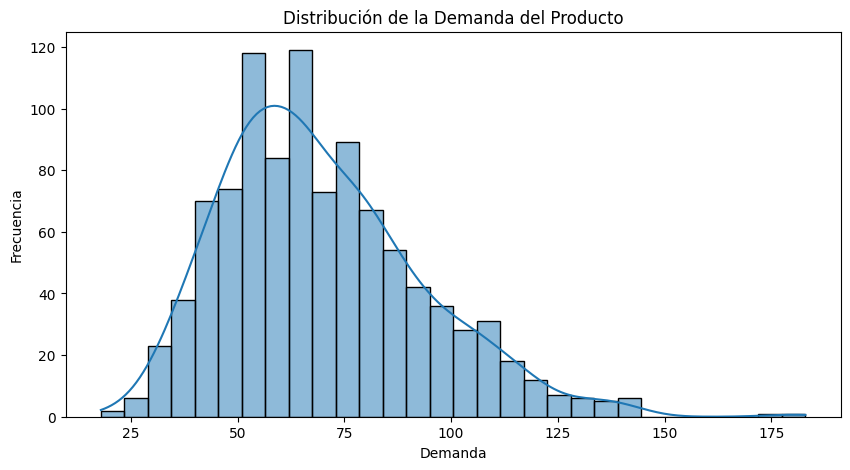

In [9]:
# Graficar el histograma de la columna 'demanda'
plt.figure(figsize=(10, 5))
sns.histplot(demanda_prod_df['demanda'], kde=True, bins=30)

# Añadir etiquetas y título
plt.xlabel('Demanda')
plt.ylabel('Frecuencia')
plt.title('Distribución de la Demanda del Producto')

plt.show()

Los datos parecn seguir una distribucion normal pero aca estamos considerando datos de todos los meses ignorando eventualidades como la paricion de la tienda de la competencia.

**Insight:** la mejor manera de detectar outliers en una serie de tiempo es graficando el comportamiento mes a mes.

Verificaremos el insight separando datos tanto antes como despues.

In [14]:
# Ordenamiento por date
demanda_prod_df = demanda_prod_df.sort_values(by='date', ascending=True)
# Creacion de columnas de meses del anio
demanda_prod_df['mes'] = demanda_prod_df['date'].dt.month


# Datos previos a aparicion de tienda de competencia
demanda_antes_comp_df = demanda_prod_df[demanda_prod_df['date']<'2021-07-01']
# Datos desde que aparece de tienda de competencia
demanda_despues_comp_df = demanda_prod_df[demanda_prod_df['date']>='2021-07-01']

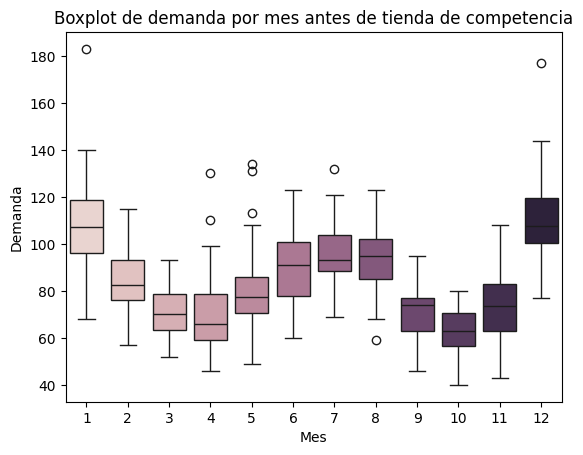

In [18]:
# Grafica de distribucion de datos con seaborn
# Crear boxplot de 'Salario' por 'Departamento'
sns.boxplot(x='mes', y='demanda', data=demanda_antes_comp_df, hue='mes', legend=False)
plt.title('Boxplot de demanda por mes antes de tienda de competencia')
plt.xlabel('Mes')
plt.ylabel('Demanda')
plt.show()

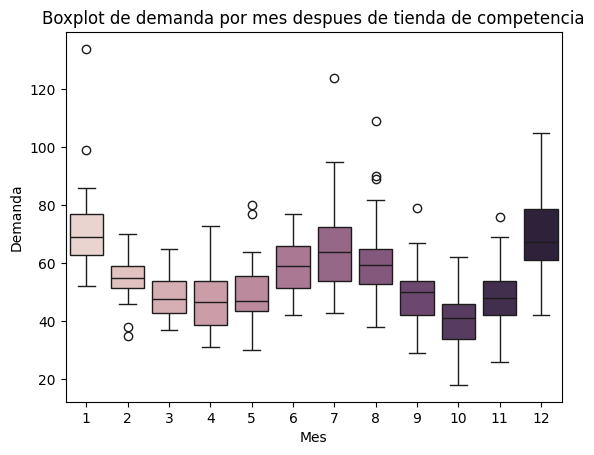

In [19]:
# Grafica de distribucion de datos con seaborn
# Crear boxplot de 'Salario' por 'Departamento'
sns.boxplot(x='mes', y='demanda', data=demanda_despues_comp_df, hue='mes', legend=False)
plt.title('Boxplot de demanda por mes despues de tienda de competencia')
plt.xlabel('Mes')
plt.ylabel('Demanda')
plt.show()

**Conclusion de outliers**

Siempre hay outliers superiores en enero y antes de junio (abril o mayo), lo que cambio es que antes de la tienda de la competencia se tenian dias atipicos superiores con muchas ventas entre abril y julio, mientras que despues de la llegada de la competencia, hay mas bien valores atipicos superiores entre julio y septiembre.


**Accion:** Si bien parece que el promedio de las ventas disminuyo con la llegada de la competencia, para el rango de ventas que se realizan desde entonces, se recomienda hacer mayor adquisicion del producto para los meses julio a septiembre para cubrir lo mejor posible la demanda atipica

# Fase 2: Análisis de Series de Tiempo

## 1. Visualización de la serie temporal

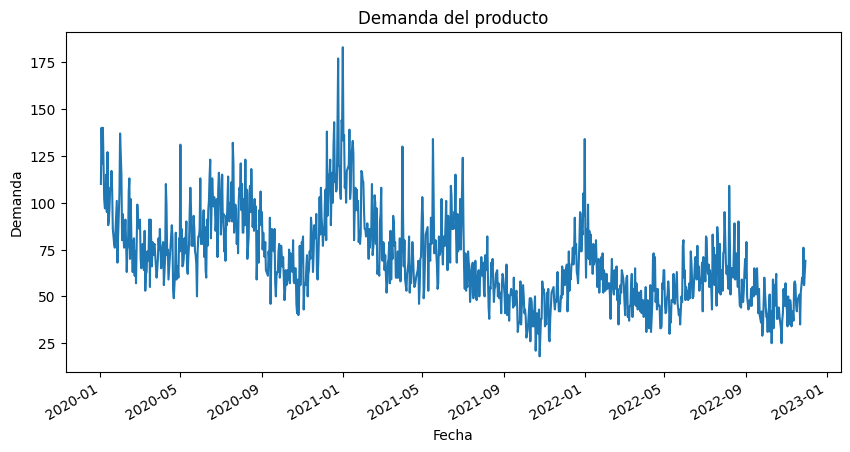

In [7]:
# Grafica de la variable objetivo:
plt.figure(figsize=(10,5))
plt.plot(demanda_prod_df['date'], demanda_prod_df['demanda'])

# Formatear los ticks para que muestren solo el mes y el anio
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m'))

# Rotar los x-ticks para mayor legibilidad
plt.gcf().autofmt_xdate()

plt.xlabel('Fecha')
plt.ylabel('Demanda')
plt.title("Demanda del producto")

plt.show()

## 2. Detección de estacionalidad y tendencia

In [25]:
from statsmodels.tsa.seasonal import seasonal_decompose, STL

**Elementos de una serie de tiempo $Y_t$ tras descomposicion:**
- Tendencia $T_t$
- Estacionalidad $S_t$
- Error $e_t$

**Tipo de descomposiciones:**
- **Aditiva**: Utiliza este modelo si los componentes de tendencia (T), estacionalidad (S) y ruido (e) son aproximadamente constantes en su amplitud a lo largo del tiempo.

Modelo: $Y_t = T_t + S_t + e_t$

- **Multiplicativa**: Utiliza este modelo si los componentes varían proporcionalmente con el nivel de la serie de tiempo. La estacionalidad y la tendencia multiplican la serie.

Modelo: $Y_t = T_t \times S_t \times e_t$

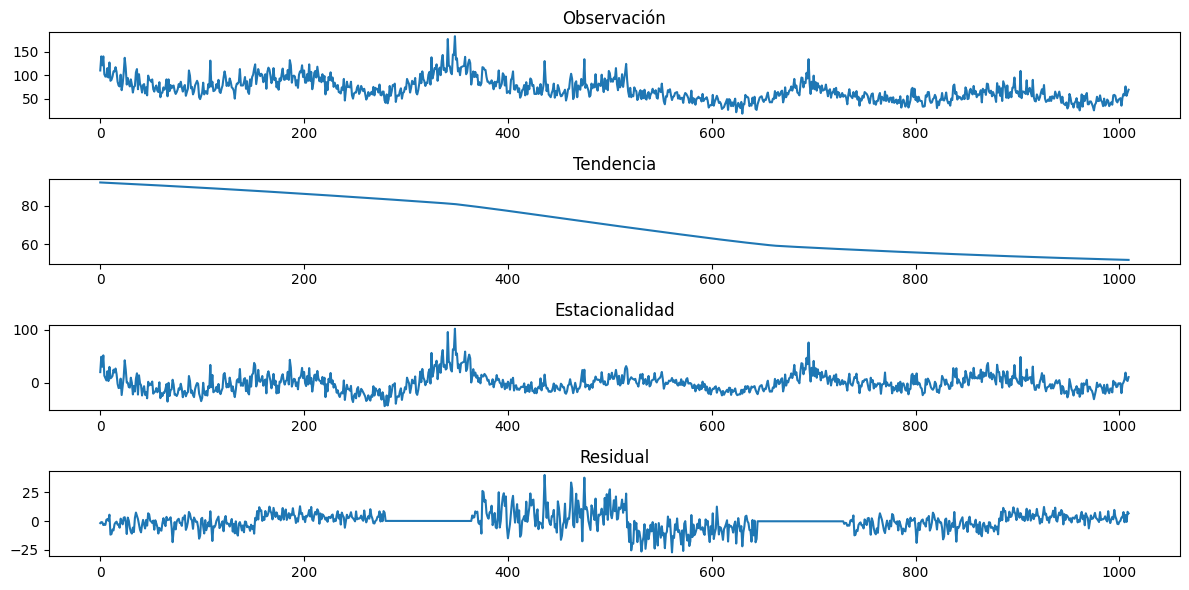

In [27]:
#decomposicion = seasonal_decompose(demanda_prod_df['demanda']
#                                   , model='additive'
#                                   , period=1365
#                                   )

stl = STL(demanda_prod_df['demanda'], period=365)
decomposicion = stl.fit()

# Graficar los componentes de la descomposición
plt.figure(figsize=(12, 6))

# Observación original
plt.subplot(411)
plt.plot(decomposicion.observed)
plt.title('Observación')

# Tendencia
plt.subplot(412)
plt.plot(decomposicion.trend)
plt.title('Tendencia')

# Estacionalidad
plt.subplot(413)
plt.plot(decomposicion.seasonal)
plt.title('Estacionalidad')

# Residual
plt.subplot(414)
plt.plot(decomposicion.resid)
plt.title('Residual')

plt.tight_layout()
plt.show()

In [ ]:
# Descomposicion aditiva

## 3. Autocorrelación y patrones temporales

## 4. Medias móviles y suavizado
**Proposito:**

# Fase 3: Evaluación del Impacto de la Nueva Tienda Competidora

## 1. Comparación antes/después del evento

## 2. Prueba de impacto estadístico